#  Spam classification with Support Vector Machines.

## Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, metrics, svm
from IPython.display import Image

## Exploring the Dataset

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/PriyushKumar/datasets/main/spam%20ham%20data%20set.csv', encoding='latin-1')

## Distribution spam/non-spam plots

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


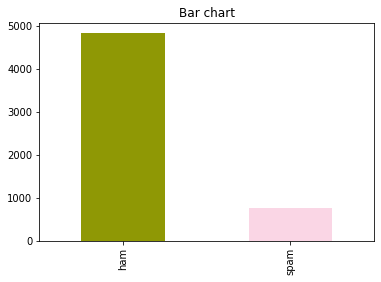

In [17]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["#8f9805", (0.9, 0.2, 0.5, 0.2)])
plt.title('Bar chart')
plt.show()

## Text Analytics

## Feature engineering

In [18]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
np.shape(X)

(5572, 8404)

## Predictive Analysis

In [19]:
data["v1"]=data["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.5, random_state=1)
print([np.shape(X_train), np.shape(X_test)])

[(2786, 8404), (2786, 8404)]


In [20]:
def my_kernel(X, Y):
  return np.dot(X, Y.T)

### Support Vector Machine

In [21]:
list_C = np.arange(100, 200, 300) #100000
train_res = []
krnl = ['linear','sigmoid','rbf','poly']
for i in krnl:
  for C in list_C:
    svc = svm.SVC(C=C, kernel=i)
    svc.fit(X_train, y_train)
    temp = svc.score(X_train, y_train)
  train_res.append(temp)

Train Accuracy

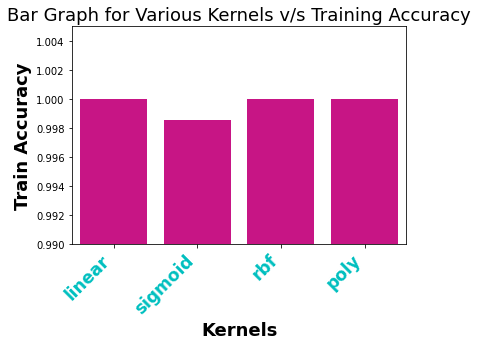

In [22]:
height = train_res
bars = ('linear','sigmoid','rbf','poly')
y_pos = np.arange(len(bars))
plt.axis([-.5, 3.5, 0.99, 1.005])

# Basic plot
plt.bar(y_pos, height, color='mediumvioletred')
plt.xlabel('Kernels',fontweight='bold',fontsize=18.0)

plt.ylabel('Train Accuracy',fontweight='bold',fontsize=18.0)
plt.title('Bar Graph for Various Kernels v/s Training Accuracy',fontsize=18.0)

# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, color='c', rotation=45,
fontweight='bold', fontsize='17', horizontalalignment='right')
plt.show()

In [23]:
list_C = np.arange(1000, 2000, 3000) #100000
count = 0
test_res = []

krnl = ['linear','sigmoid','rbf','poly']
for i in krnl:
  for C in list_C:
    svc = svm.SVC(C=C, kernel=i)
    svc.fit(X_train, y_train)
    temp = svc.score(X_test, y_test)
  test_res.append(temp)


Test Accuracy

In [24]:
test_res

[0.9752333094041636,
 0.9544149318018664,
 0.9727207465900933,
 0.9242641780330223]

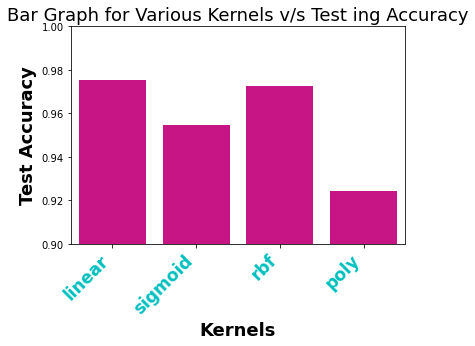

In [25]:
height = test_res
bars = ('linear','sigmoid','rbf','poly')
y_pos = np.arange(len(bars))
plt.axis([-.5, 3.5, 0.90, 1.0])

# Basic plot
plt.bar(y_pos, height, color='mediumvioletred')

plt.xlabel('Kernels',fontweight='bold',fontsize=18.0)

plt.ylabel('Test Accuracy',fontweight='bold',fontsize=18.0)
plt.title('Bar Graph for Various Kernels v/s Test ing Accuracy',fontsize=18.0)

# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, color='c', rotation=45,
fontweight='bold', fontsize='17', horizontalalignment='right')
plt.show()